# Solving an IVP
We consider an IVP of the form $y'' = g(t)-\alpha y$ with $y(0) = v_0$ and $y'(0) = v'_0$. The independent variable is time ($t$) and we want to discretize to avoid working with a continuum amount of values. Hence, we set a time quantum $\varepsilon$ to be a small time interval and consider the equation on values that are multiples of the quantum. If the quantum is small enough, the following equations will be a good approximation of the problem (they can be derived from the derivative and second derivative definitions).
$$ \begin{align*}
       y'(k\varepsilon) &= \frac{y(k\varepsilon) - y((k-1)\varepsilon)}{\varepsilon} &&\mbox{(backward difference)}\\
       y''(k\varepsilon) &= \frac{y((k+1)\varepsilon) - 2y(k\varepsilon) + y((k-1)\varepsilon)}{\varepsilon^2} &&\mbox{(center difference)}
\end{align*} $$

For simplicity, we will write $y_{k} := y(k\varepsilon)$, we then rewrite the second equation. $$y''(k\varepsilon) = \frac{y_{k+1} - 2y_{k} + y_{k-1}}{\varepsilon^2}$$

If we use this in our differential equation, we get a recurrence formula for $y_k$.
$$ \begin{align*}
y''(k\varepsilon) = \frac{y_{k+1} - 2y_{k} + y_{k-1}}{\varepsilon^2} &= g(k\varepsilon) - \alpha y_k\\
y_{k+1} - 2y_{k} + y_{k-1} &= \varepsilon^2(g(k\varepsilon) - \alpha y_k)\\
y_{k+1} &= (2-\alpha\varepsilon^2)y_k -y_{k-1} + \varepsilon^2(g(k\varepsilon))
\end{align*} $$

The initial values give us the start of this problem, in our case, we have $y_0 = v_0$ and $y_1 = v_0 + v'_0\varepsilon$. Now, we can solve the recurrence using forward substitution.

The following code implements this IVP solver. The specific IVP we are solving has $\alpha = \frac{g}{\ell}$ and $g(t) = \frac{1}{2}\mu\cdot S(t) + v^2(t) \cdot Cx + \frac{1}{m\cdot \ell}$ for some functions $S$ and $v^2$. It is modelling the motion of a cable car on its cable with known wind behaviour. The original formula was the following.
$$ \ddot{\theta} + \frac{g}{\ell}\theta = \frac{1}{2}\mu\cdot S(t) + v^2(t) \cdot Cx + \frac{1}{m\cdot \ell} $$

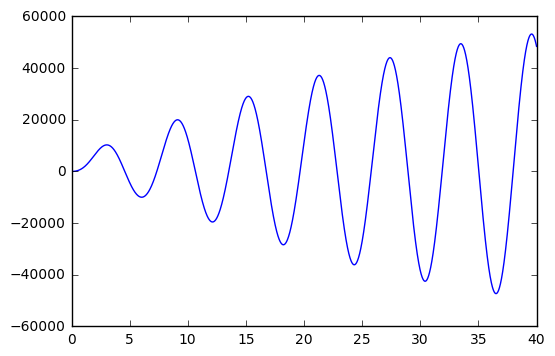

In [7]:
## - Modules - ##
import numpy as np
import matplotlib.pyplot as plt

## - Constants - ##
t_end = 40 # ending time of the simulation (t_start = 0)
steps = 8000
domain = np.linspace(0,t_end,steps)
eps = t_end/steps # value of epsilon (the time quantum)
epsq = eps*eps # epsilon^2
g = 9.8
ell = 8.69
mu = 1.29
Cx = 0.7
m = 12000
alpha = g/ell


## - Defining functions - ##
def S(t):
    # Surfact of cabin that is exposed to wind
    return 15.63
def v2(t):
    # Speed of wind
    return pow((50*np.sin(t) + 50),2)

def g(t):
    # This is the function g(t)*epsilon^2
    return epsq*(mu/2*S(t) + v2(t)*Cx+1/(m*ell))

g_values = list(map(g, domain)) # these are the values of eps^2 * g(t) that we will need

def recSolver(a,b,constants, v_0, v_1):
    # solves a recurrence of the type y_(k+1) = ay_k + b_(k-1) + c_k with y_0 = v_0 and y_1 = v_1
    values = [v_0, v_1] # initial values
    for i in range(2, len(constants)): # iterate from y_2 to y_n, n is the last constant c_n we have
        y_next = values[-1]*a + values[-2]*b + constants[i-1] #computes next value
        values.append(y_next) # adds it to the list
    return values # return the list of values we found

solution = recSolver(2-alpha*epsq, -1,g_values, 0, 0.005)
#plotting the solution
plt.plot(domain, solution)
plt.show()